In [146]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

- 2013년이후 전국 아파트분양가격
- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [147]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
# from matplotlib.font_manager import FontProperties
# font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
# font_prop = FontProperties(fname=font_path, size=20)
# plt.rc('font', family= font_prop.get_name())
# warning(경고) 안보이게
warnings.filterwarnings(action='ignore')

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [148]:
df_first= pd.read_csv('C:/aii/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [149]:
df_first.shape

(17, 22)

In [150]:
pd.options.display.max_columns=22 #최대 display가능한 열수 수정
df_first.tail(1)   

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [151]:
df_first.info() # 결측치, 타입확인
df_first.isna().sum() #열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [152]:
df_first_heat = df_first.set_index('지역')
df_first_heat.sample()


,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: ylabel='지역'>

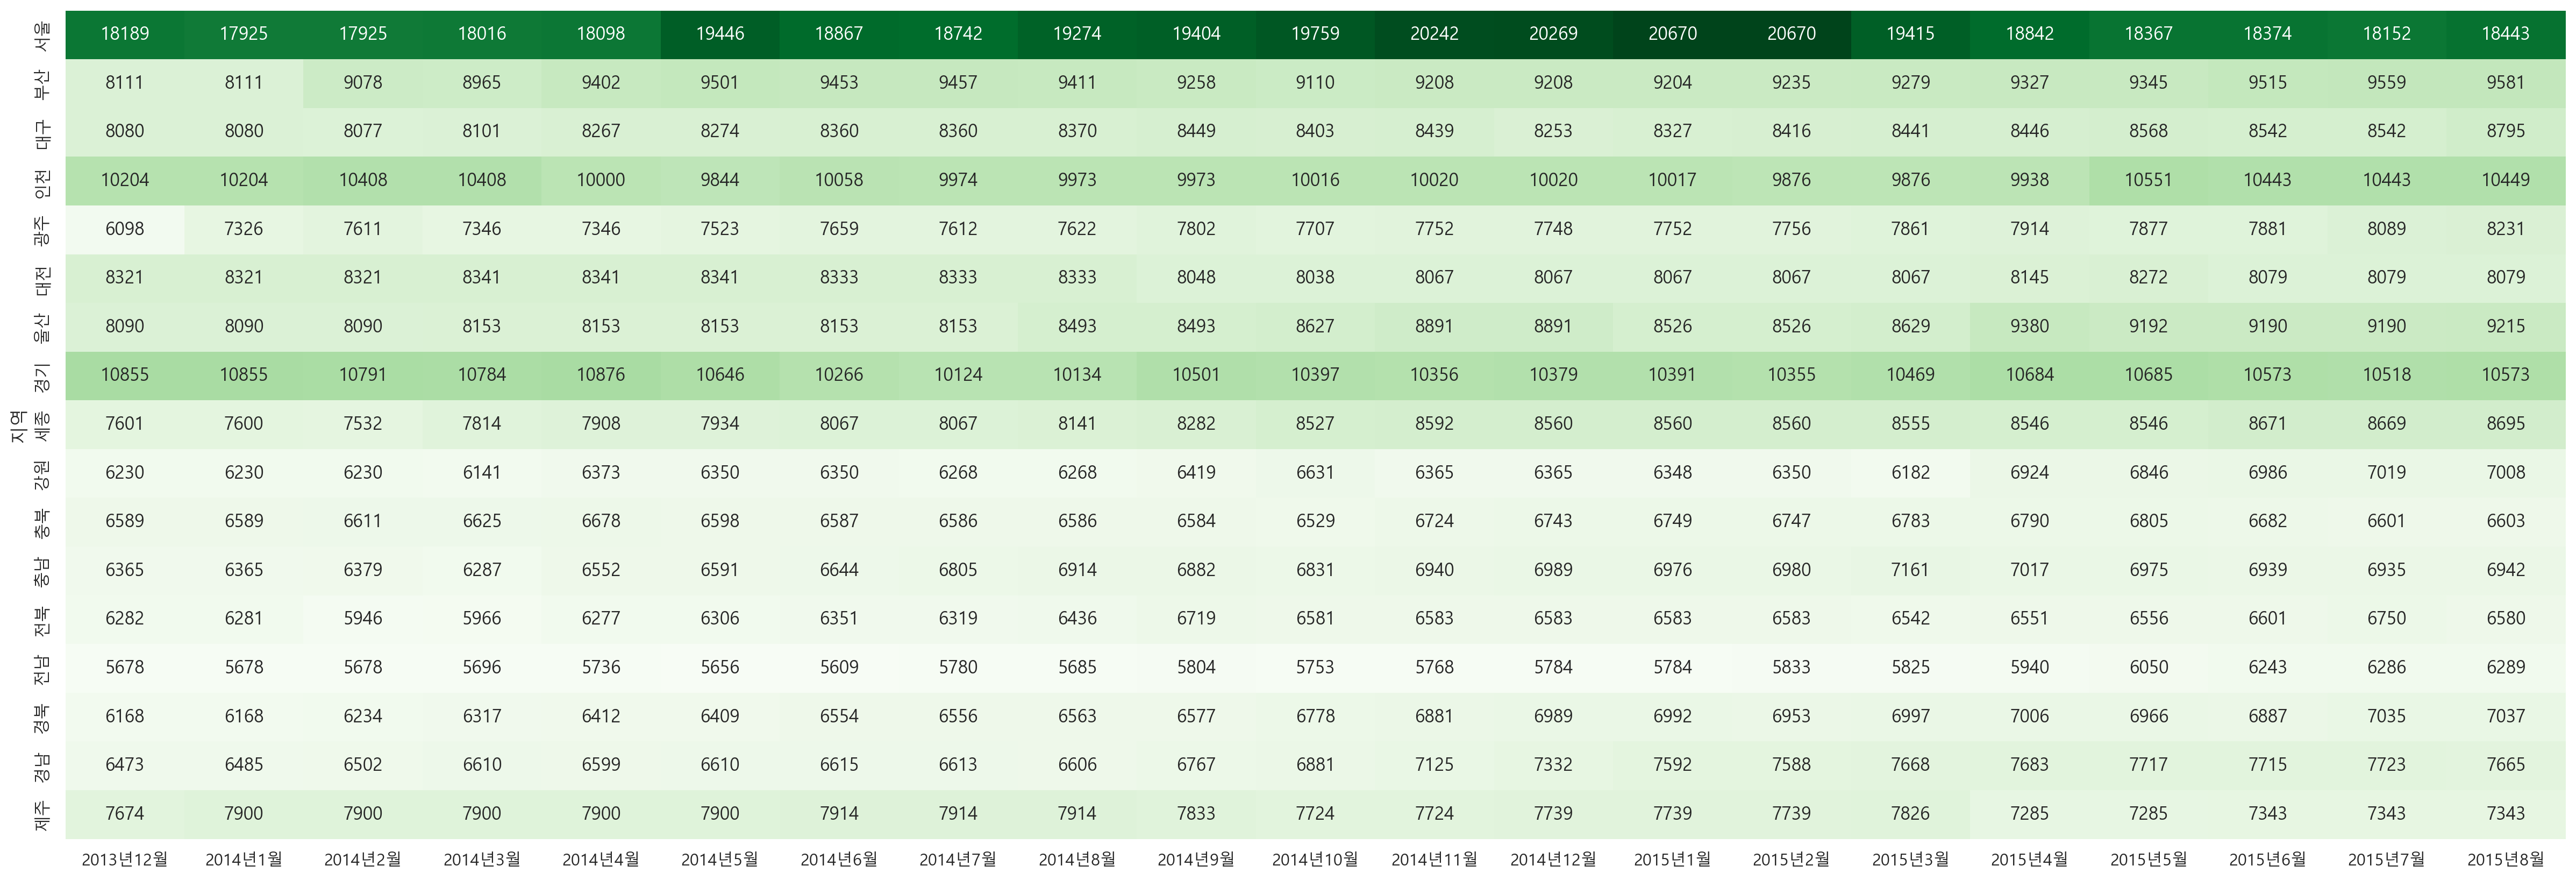

In [153]:
plt.figure(figsize=(30,10))
sns.heatmap(df_first_heat, annot= True, fmt='d',cmap='Greens',cbar=False)

## (2) 이후 데이터는 df_last 변수에 담아 탐색

In [154]:
df_last= pd.read_csv('c:/aii/downloads/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',encoding='cp949')
df_last.shape

(9095, 5)

In [155]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [156]:
# 열별 결측치 갯수
df_last.isnull().sum()
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [157]:
# 열별 결측치를 제외한 갯수
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

In [158]:
# '분양가격(제곱미터)' 컬럼의 결측치 갯수와 결측치가 아닌 갯수, 전체 데이터 수
print('전체갯수는: ',len(df_last['분양가격(제곱미터)']),df_last.shape[0])
print('전체갯수는: ',df_last['분양가격(제곱미터)'].notnull().sum())

전체갯수는:  9095 9095
전체갯수는:  8481


# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [159]:
df_last.loc[0,'분양가격(제곱미터)']

'5841'

In [160]:
# df_last.groupby('지역명')['분양가격(제곱미터)'].mean() 에러난다.
# df_last['분양가격(제곱미터)'] * 3.3 에러남
# 에러 나는 이유는

In [161]:
# df_last['분양가격(제곱미터)'].astype('float') (' ', '6,244')-> 에러남 
 #숫자로 변경할 때 예외발생시 예외 발생말고 NaN으로
pd.to_numeric(df_last['분양가격(제곱미터)'], errors= 'coerce').isna().sum()# 원래 결측치갯수(614)

744

In [162]:
#분양가격에 space가 있는 경우
df_last[df_last['분양가격(제곱미터)'].str.strip()== ''].shape

(126, 5)

In [163]:
df_last[df_last['분양가격(제곱미터)'].notnull() &
    (df_last['분양가격(제곱미터)'].str.find(',')!=-1) ]

,지역명,규모구분,연도,월,분양가격(제곱미터)
80,제주,모든면적,2015,10,"2,232"
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574"


In [164]:
df_last[df_last['분양가격(제곱미터)'].str.strip()== ''].shape

(126, 5)

In [165]:
df_last.loc[df_last['분양가격(제곱미터)'].str.strip()== '', '지역명'].value_counts()

세종    30
제주    19
대구    19
광주    12
전남    11
대전    10
울산    10
전북     8
경남     5
서울     2
Name: 지역명, dtype: int64

### apply
- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [166]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',','')

'12523'

In [167]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited= temp.split(',')
tempsplited
''.join(tempsplited)

'12523'

In [168]:
commadrop(df_last.loc[80])

지역명               제주
규모구분            모든면적
연도              2015
월                 10
분양가격(제곱미터)    2232.0
Name: 80, dtype: object

In [169]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    # price(스칼라데이터)가 결측치인지 여부
        # (1) price is np.nan : 값의 타입에 상관없이 nan인지 여부
        # (2) pd.isna(price), pd.isnull(값): 값의 타입에 상관없이 nan인지 여부
        # (3) np.isnan(숫자데이터): 값이 숫자가 아닐 경우 에러, 숫자일 경우 nan인지 여부
    if price is np.nan:
        pass
    elif price.strip() == '': #space면 결측치로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1: #콤마(,)가 있으면 , 없애고 float형 변환
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row
    
    
commadrop(df_last.loc[80]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
Name: 368, dtype: object

In [170]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용

df_last.apply(commadrop, axis=1).isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    740
dtype: int64

### map

In [171]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        pricesplited = price.split(',')
        return float(''.join(pricesplited))
    else:
        return float(price)

commadrop2(df_last.loc[80, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [172]:
df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['분양가격(제곱미터)'].map(commadrop2)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

In [173]:
pd.to_numeric(df_last["분양가격(제곱미터)"].str.strip().str.replace(',','')).isna().sum()

740


### apply나 map사용 안 하기

In [174]:
df_last['분양가격(제곱미터)']= \
    pd.to_numeric(df_last["분양가격(제곱미터)"].str.strip().str.replace(',',''))

In [175]:
# 80(,), 28(공백), 368(결측치)
df_last.loc[28]

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2015
월                                  10
분양가격(제곱미터)                        NaN
Name: 28, dtype: object

In [176]:
df_last['평당분양가격']= df_last['분양가격(제곱미터)'] * 3.3
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [177]:
df_last['평당분양가격'].describe()

count     8355.000000
mean     13032.995512
std       5729.523419
min       6164.400000
25%       9038.700000
50%      11513.700000
75%      15034.800000
max      61917.900000
Name: 평당분양가격, dtype: float64

# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [178]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [179]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [180]:
# 전용면적, 이하, ' ' 없애기, 제곱미터-> m², 초과 ->~
x = '전용면적  85제곱미터초과 102제곱미터이하'
# x.replace('전용면적', '').replace('이하','').replace(' ','').replace('제곱미터')~
import re
re.sub('전용면적|이하| ','',x).replace('제곱미터', 'm²').replace('초과','~')

'85m²~102m²'

In [181]:
# 방법1
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : 
    re.sub('전용면적|이하| ', '', x).replace('제곱미터', 'm²').replace('초과','~'))
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²


In [182]:
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²


In [183]:
# 방법2
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('전용면적',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('제곱미터','m²'))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('초과','~'))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('이하',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace(' ',''))

In [184]:
# 방법3
df_last['전용면적']= df_last['규모구분'].str.replace('전용면적', '')\
                                    .str.replace('제곱미터','m²')\
                                    .str.replace('초과','~')\
                                    .str.replace('이하','')\
                                    .str.replace(' ','')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [185]:
print(df_last['규모구분'].unique())
print(df_last['전용면적'].unique())

['모든면적' '전용면적 60제곱미터이하' '전용면적 60제곱미터초과 85제곱미터이하' '전용면적 85제곱미터초과 102제곱미터이하'
 '전용면적 102제곱미터초과']
['모든면적' '60m²' '60m²~85m²' '85m²~102m²' '102m²~']


# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [186]:
df_last= df_last.drop(['규모구분','분양가격(제곱미터)'],axis=1) #열을 제거 

In [187]:
# 컬럼 순서를 바꿔서 백업
# df_last= df_last[['지역명','전용면적','연도','월','평당분양가격']]
col= df_last.pop('전용면적')# 전용면적 컬럼빼서 col변수 할당
df_last.insert(1, '전용면적', col) # 1번째 열에 col추가


In [188]:
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7


In [189]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

In [190]:
df_last = pd.read_csv('data/df_last.csv')

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [191]:
#지역별 데이터 수(결측치 포함)
df_last['지역명'].value_counts() # 정렬까지

서울    535
강원    535
경남    535
경북    535
전남    535
전북    535
충남    535
충북    535
세종    535
인천    535
울산    535
대전    535
광주    535
대구    535
부산    535
경기    535
제주    535
Name: 지역명, dtype: int64

In [192]:
# 지역명별 데이터 행 갯수(결측치 제외): 결과가 1차원시리즈
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values()

지역명
울산    395
세종    409
대전    415
제주    439
광주    450
대구    495
전남    507
경북    511
경남    516
충남    516
전북    520
강원    523
서울    527
인천    531
부산    533
충북    533
경기    535
Name: 평당분양가격, dtype: int64

In [193]:
# 지역명별 데이터 행 갯수(결측치 제외): 결과가 2차원 데이터프레임 - groupby
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(ascending=False)
#2
df_last.groupby(['지역명'])['평당분양가격'].count().reset_index().sort_values(by='평당분양가격', ascending=False).T

,1,16,7,11,8,0,13,2,15,3,12,5,4,14,6,9,10
지역명,경기,충북,부산,인천,서울,강원,전북,경남,충남,경북,전남,대구,광주,제주,대전,세종,울산
평당분양가격,535,533,533,531,527,523,520,516,516,511,507,495,450,439,415,409,395


In [194]:
# 지역명별 데이터 행 갯수(결측치 제외): 결과가 2차원 데이터프레임- pivot_table
df_last.pivot_table(index=['지역명'],values='평당분양가격',aggfunc='count')
pd.pivot_table(df_last, index='지역명', values='평당분양가격', aggfunc='count').transpose()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [195]:
# 지역명별 평당분양가격 최대값
df_last.groupby(['지역명'])['평당분양가격'].max().reset_index().sort_values(by='평당분양가격', ascending=False).T


,8,11,7,6,5,10,14,4,1,9,0,2,3,12,15,13,16
지역명,서울,인천,부산,대전,대구,울산,제주,광주,경기,세종,강원,경남,경북,전남,충남,전북,충북
평당분양가격,61917.9,54723.9,31904.4,30851.7,30600.9,27815.7,27753.0,24951.3,24172.5,21087.0,17806.8,16566.0,15345.0,15087.6,14932.5,14774.1,13685.1


In [196]:
# 지역명별 평당분양가격 평균
df_last.pivot_table(index=['지역명'],values='평당분양가격',aggfunc='mean')

,평당분양가격
지역명,
강원,10078.717400
경기,15420.030280
경남,10776.955814
경북,10261.553425
광주,12998.216000
대구,14434.520000
대전,12829.565060
부산,14896.949156
서울,27755.404554


In [197]:
#지역명별 평당분양가격 통계요약정보
df_last.pivot_table(index=['지역명'],values='평당분양가격',aggfunc='describe').round(1)

,25%,50%,75%,count,max,mean,min,std
지역명,,,,,,,,
강원,7652.7,9428.1,11873.4,523.0,17806.8,10078.7,6639.6,2828.9
경기,13274.2,14652.0,17168.2,535.0,24172.5,15420.0,10160.7,3245.9
경남,9187.2,10254.8,12031.8,516.0,16566.0,10777.0,7260.0,2223.6
경북,8378.7,9705.3,12500.4,511.0,15345.0,10261.6,6949.8,2276.0
광주,9554.3,12673.6,15213.0,450.0,24951.3,12998.2,7428.3,3637.6
대구,11949.3,14711.4,16338.3,495.0,30600.9,14434.5,8259.9,3407.3
대전,9401.7,11820.6,15310.4,415.0,30851.7,12829.6,8002.5,4191.7
부산,12467.4,13411.2,17301.9,533.0,31904.4,14896.9,9669.0,4059.9
서울,22497.8,26763.0,31054.6,527.0,61917.9,27755.4,16701.3,6566.4


In [198]:
# 지역명별 평당분양가격 describe(데이터갯수, 평균, 표준편차, 최소값, q1, q2, q2 최대값)
df_last.groupby('지역명')['평당분양가격'].describe().applymap(lambda x: round(x,1))
df_last.groupby('지역명')['평당분양가격'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,523.0,10078.7,2828.9,6639.6,7652.7,9428.1,11873.4,17806.8
경기,535.0,15420.0,3245.9,10160.7,13274.2,14652.0,17168.2,24172.5
경남,516.0,10777.0,2223.6,7260.0,9187.2,10254.8,12031.8,16566.0
경북,511.0,10261.6,2276.0,6949.8,8378.7,9705.3,12500.4,15345.0
광주,450.0,12998.2,3637.6,7428.3,9554.3,12673.6,15213.0,24951.3
대구,495.0,14434.5,3407.3,8259.9,11949.3,14711.4,16338.3,30600.9
대전,415.0,12829.6,4191.7,8002.5,9401.7,11820.6,15310.4,30851.7
부산,533.0,14896.9,4059.9,9669.0,12467.4,13411.2,17301.9,31904.4
서울,527.0,27755.4,6566.4,16701.3,22497.8,26763.0,31054.6,61917.9


## (3) 전용면적별 평당분양가격(평균)

In [199]:
df_last.groupby('전용면적', )[['평당분양가격']].mean().sort_values(by='평당분양가격')

,평당분양가격
전용면적,
60m²,12522.774427
60m²~85m²,12619.048827
모든면적,12654.068098
85m²~102m²,13447.672835
102m²~,14066.826846


In [200]:
df_last.pivot_table(index='전용면적', values=['평당분양가격'],)

,평당분양가격
전용면적,
102m²~,14066.826846
60m²,12522.774427
60m²~85m²,12619.048827
85m²~102m²,13447.672835
모든면적,12654.068098


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [201]:
df_last.pivot_table(index=('지역명','전용면적'),values=['평당분양가격'],aggfunc='mean')

평당분양가격
지역명 전용면적                    
강원  102m²~      11314.805607
    60m²         9441.885981
    60m²~85m²    9383.472897
    85m²~102m²  10795.481053
    모든면적         9538.326168
...                      ...
충북  102m²~       9369.532710
    60m²         8598.227103
    60m²~85m²    8558.503738
    85m²~102m²   9418.420000
    모든면적         8547.986916

[85 rows x 1 columns]

In [202]:
r =df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()
print(r['서울','모든면적'])
print(r['서울']) # 서울 모든전용면적
print(r[:, '모든면적']) # 모든지역의 모든 면적

26829.6785046729
전용면적
102m²~        29035.948515
60m²          27371.156075
60m²~85m²     26662.612150
85m²~102m²    28972.177143
모든면적          26829.678505
Name: 평당분양가격, dtype: float64
지역명
강원     9538.326168
경기    14722.780374
경남    10146.513084
경북     9856.637383
광주    12798.356075
대구    14516.541346
대전    11947.572897
부산    14764.539252
서울    26829.678505
세종    10840.996774
울산    13470.835714
인천    13896.793458
전남     8970.541121
전북     8662.284112
제주    16338.885981
충남     9153.583178
충북     8547.986916
Name: 평당분양가격, dtype: float64


In [203]:
r = df_last.groupby(['지역명','전용면적'])[['평당분양가격']].mean()
print(r.loc['서울'])  #레벨0 인덱스로 액세스
print(r.loc['서울','모든면적'])
print(r.xs(key='모든면적',level='전용면적')) #레벨1인덱스로 액세스

                  평당분양가격
전용면적                    
102m²~      29035.948515
60m²        27371.156075
60m²~85m²   26662.612150
85m²~102m²  28972.177143
모든면적        26829.678505
평당분양가격    26829.678505
Name: (서울, 모든면적), dtype: float64
           평당분양가격
지역명              
강원    9538.326168
경기   14722.780374
경남   10146.513084
경북    9856.637383
광주   12798.356075
대구   14516.541346
대전   11947.572897
부산   14764.539252
서울   26829.678505
세종   10840.996774
울산   13470.835714
인천   13896.793458
전남    8970.541121
전북    8662.284112
제주   16338.885981
충남    9153.583178
충북    8547.986916


In [204]:
# unstack(): level0 (지역명) 인덱스는 그대로 두고, level1(전용면적)을 컬럼으로
df_last.groupby(['지역명','전용면적'])[['평당분양가격']].mean().unstack().round(1)

평당분양가격                                       
전용면적   102m²~     60m² 60m²~85m² 85m²~102m²     모든면적
지역명                                                 
강원    11314.8   9441.9    9383.5    10795.5   9538.3
경기    16559.1  15291.2   14787.2    15739.9  14722.8
경남    11522.5  10122.2   10107.8    12150.6  10146.5
경북    11060.6   9731.9    9828.3    10968.3   9856.6
광주    14749.2  12254.0   12656.0    12291.7  12798.4
대구    15564.0  13748.4   14494.4    13713.9  14516.5
대전    17662.0  11834.2   11920.1    13002.6  11947.6
부산    15741.4  14448.6   14745.0    14801.0  14764.5
서울    29035.9  27371.2   26662.6    28972.2  26829.7
세종    10684.5  10776.5   10775.3    10600.0  10841.0
울산    14809.0  13624.1   13520.4    15303.8  13470.8
인천    16266.6  13847.1   13879.2    14742.0  13896.8
전남    10206.9   9104.6    8928.4     8807.8   8970.5
전북     9448.1   8531.1    8623.8     9169.8   8662.3
제주    16770.9  14971.0   16070.6    14679.5  16338.9
충남    10379.4   9231.1    9418.3    10818.8   9153.6
충북     9369.5   8598.2    8558.5     9418.4   8548.0

In [205]:
df_last.pivot_table(index=('지역명','전용면적'),values=['평당분양가격'],aggfunc='mean').unstack()

평당분양가격                                                        
전용면적        102m²~          60m²     60m²~85m²    85m²~102m²          모든면적
지역명                                                                       
강원    11314.805607   9441.885981   9383.472897  10795.481053   9538.326168
경기    16559.091589  15291.151402  14787.207477  15739.920561  14722.780374
경남    11522.478000  10122.231429  10107.838318  12150.634021  10146.513084
경북    11060.616346   9731.888571   9828.325234  10968.300000   9856.637383
광주    14749.190323  12254.043564  12655.962617  12291.714286  12798.356075
대구    15564.029412  13748.378351  14494.393269  13713.937500  14516.541346
대전    17662.047458  11834.224752  11920.124299  13002.643902  11947.572897
부산    15741.408571  14448.602804  14744.955140  14801.024299  14764.539252
서울    29035.948515  27371.156075  26662.612150  28972.177143  26829.678505
세종    10684.533750  10776.462162  10775.270000  10600.012500  10840.996774
울산    14809.050000  13624.088372  13520.403061  15303.785106  13470.835714
인천    16266.597087  13847.139252  13879.183178  14741.994393  13896.793458
전남    10206.869159   9104.605714   8928.350467   8807.822222   8970.541121
전북     9448.054206   8531.055446   8623.794393   9169.757143   8662.284112
제주    16770.922826  14971.028571  16070.599065  14679.460714  16338.885981
충남    10379.433333   9231.086916   9418.292523  10818.775000   9153.583178
충북     9369.532710   8598.227103   8558.503738   9418.420000   8547.986916

In [206]:
r = df_last.pivot_table(index='지역명',
                   columns='전용면적',
                   values='평당분양가격',
                   # aggfunc='mean'
                   )
r = r[['60m²', '60m²~85m²','85m²~102m²','102m²~', '모든면적']]
r.head()

전용면적,60m²,60m²~85m²,85m²~102m²,102m²~,모든면적
지역명,,,,,
강원,9441.885981,9383.472897,10795.481053,11314.805607,9538.326168
경기,15291.151402,14787.207477,15739.920561,16559.091589,14722.780374
경남,10122.231429,10107.838318,12150.634021,11522.478000,10146.513084
경북,9731.888571,9828.325234,10968.300000,11060.616346,9856.637383
광주,12254.043564,12655.962617,12291.714286,14749.190323,12798.356075


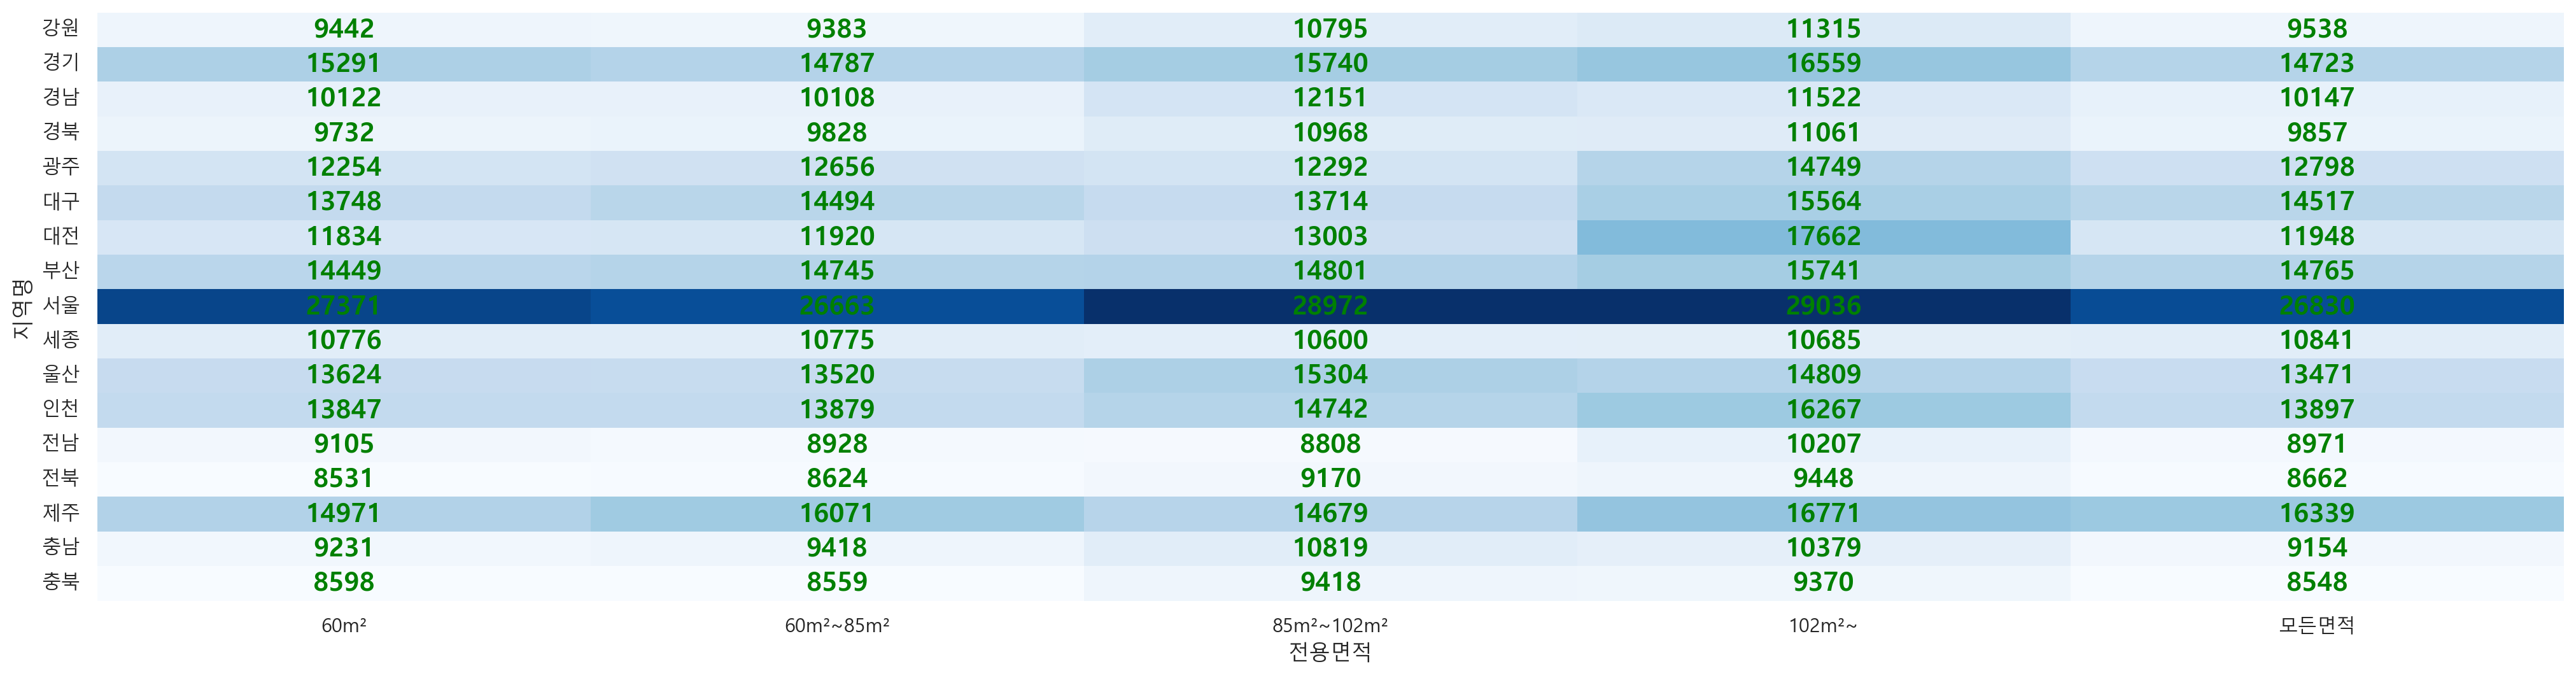

In [207]:
plt.figure(figsize=(25,6))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
            annot_kws={'color':'green','size':15,'weight':'bold'})
plt.show()

## (5) 연도, 지역별 평당분양가격(평균)

In [208]:
r = df_last.pivot_table(index='연도', columns='지역명',values='평당분양가격')
r.loc[2024].head(1)

지역명
강원    15622.2825
Name: 2024, dtype: float64

In [209]:
df_last.groupby(['연도','지역명'])[['평당분양가격']].mean().unstack().round(1)ddddd

SyntaxError: invalid syntax (3421230928.py, line 1)

In [ ]:
plt.figure(figsize=(28,6))
sns.heatmap(r, annot=True, fmt='.0f', cmap='Blues',
            annot_kws={'color':'Green','size':15,'weight':'bold'})
plt.show()

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

In [ ]:
result= df_last.groupby('지역명')['평당분양가격'].count().sort_values()
result.min(), result.max()

In [ ]:
ax= result.plot(kind='line', color='r',linestyle='--', linewidth=2,title='지역별 데이터 수')
#            ylim= [result.min()-50, result.max()+50])
# plt.title('지역별 데이터수', size=20, color='red')
ax.set_title('지역별 데이터수', size=20, color='red')
ax.set_ylim( [result.min()-50, result.max()+50])
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

In [ ]:
result.plot(kind='bar',rot=0, figsize=(18,3),title='지역별 데이터 수',
           ylim= [result.min()-10, result.max()+10])
plt.show()

## (2) 지역별 평당분양가격 (line, bar)

In [ ]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
ax = result.plot(kind='line')
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)

In [ ]:
result.plot(kind='bar', rot=30)

## (3) 전용면적별 평당분양가격(barplot)

In [ ]:
result= df_last.groupby('전용면적')['평당분양가격'].mean()
result.plot(kind='bar', rot=0)

In [ ]:
result.plot(kind= 'bar', rot=0, ylim= [result.min()-200, result.max()+300])
plt.text(0-0.1,14066+50, 14066)
plt.text(1-0.1,12522+50, 12522)
for i, val in enumerate(result):
    plt.text(i-0.1, val+50, round(val), color='b',fontsize=10, weight='bold')

In [ ]:
for i, val in enumerate(result):
    print(i, val)

## (4) 연도별 평균 평당분양가격(line, bar)

In [ ]:
result = df_last.groupby('연도')['평당분양가격'].mean()
print('result:', result)
print('x축: ', result.index)
print('y축: ',[round(r,1) for r in result])

In [ ]:
for key, val in enumerate(result):
    print(key, val)

In [ ]:
result.plot(kind='line', xticks=range(2015,2025), ylim= [result.min()-1000, result.max()+2000])
# plt.text(2015, 15000,'샘플')
for year, val in result.items():
    plt.text(year-0.2, val+200, round(val))

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

In [ ]:
result.plot(kind='bar', ylim= [result.min()-1000, result.max()+2000])
# # plt.text(2015, 15000,'샘플')
for i, val in enumerate(result):
    plt.text(i-0.2, val+200, round(val))

In [ ]:
# 연도와 평당분양가격의 상관관계
df_last[['연도','평당분양가격']].corr()

In [ ]:
df_last.groupby(['월','연도'])['평당분양가격'].mean().unstack()
r = df_last.pivot_table(index='월',
                   columns='연도',
                   values='평당분양가격')
plt.figure(figsize=(20,5))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'weight':'bold', 'size':12}
           )
plt.show()

In [ ]:
r.plot(color=['r','g','b','y','k'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
r.plot(kind='box')
plt.show()

In [ ]:
# 사분위수 계산
Q1 = r.quantile(0.25)
Q3 = r.quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건: Q3 + 1.5 * IQR 초과
outliers = r > (Q3 + 1.5 * IQR)

# 이상치 중 최댓값 찾기
max_outlier_value = r[outliers].max().max()
max_outlier_year = r[outliers].max().idxmax()

print("이상치 중 가장 큰 값:", max_outlier_value)
print("해당 연도:", max_outlier_year)


# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

## (1) 지역별 평당분양가격

In [ ]:
sns.barplot(data=df_last,x ='지역명',y= '평당분양가격', errorbar='sd')

In [ ]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
           # errorbar=None
           # errorbar=('ci',95) # 기본값(95% 신뢰구간의 평균)
            errorbar='sd' # 실제값과 표준편차
           )
plt.show()

In [ ]:
# 정렬된 순서로 시각화
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(
                                                    ascending=False)
ax= sns.barplot(data=df_last, x='지역명', y='평당분양가격',
               errorbar=None,
               order = result.index, # 정렬된 순서로 x축
               palette='Set1' 
               )
# for i, v in enumerate(result):
#     plt.text(i-0.2, v, round(v),fontsize=9)
plt.title('지역별 평당분양가격')
ax.set_ylim`
for i, val in enumerate(result):
    ax.text(i-0.3, val, round(val), fontsize=9)
plt.show()

In [ ]:
result= df_last.groupby('지역명')['평당분양가격'].count().sort_values()
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
           errorbar=None,
           # errorbar=('ci',95) # 기본값(95% 신뢰구간의 평균)
#             errorbar='sd' # 실제값과 표준편차
            estimator='count',
            order= result.index
           )
plt.ylim([200,600])
plt.show()

In [ ]:
# 지역별 평당분양가격 평균(가로막대그래프)
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_last, 
            y='지역명', x='평당분양가격', 
            order=result.index, 
            errorbar=None)
for i, v in enumerate(result):
    plt.text(v, i, f'{round(v):,}', va='center', ha='left', fontsize=9)
plt.show()

## (2) 연도별 평당분양가격

In [ ]:
sns.barplot(data=df_last, x='연도', y='평당분양가격', errorbar=None)
result = df_last.groupby('연도')['평당분양가격'].mean()
for i, v in enumerate(result):
    plt.text(i, v, round(v), va='bottom', ha='center')
    #     if v> 10000:
#         plt.text(i-0.25, v, round(v))
#     else:
#         plt.text(i-0.2, v, round(v))
plt.ylim([0,result.max()+2000])


## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

In [ ]:
# 연도별 평당분양가격 평당 추이(lineplot)
plt.figure(figsize=(15,7))
sns.lineplot(data= df_last, x= '연도', y= '평당분양가격', hue='지역명')
plt.xticks(range(2015,2025))
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.show()

In [ ]:
g= sns.relplot(data= df_last, x='연도', y='평당분양가격', hue='지역명',
               kind='line',col='지역명', col_wrap=4, facet_kws={'sharex':False})

g.fig.set_size_inches(10,10)
plt.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(1,1))
plt.show()

In [ ]:
g= sns.catplot(data= df_last, x='연도', y='평당분양가격',
               kind='bar',col='지역명', col_wrap=4,
              sharex=False)

g.fig.set_size_inches(10,10)
plt.show()

In [ ]:
# 연도별 평당분양가격 사분위수: boxplot(분포X), boxenplot, violinplot
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

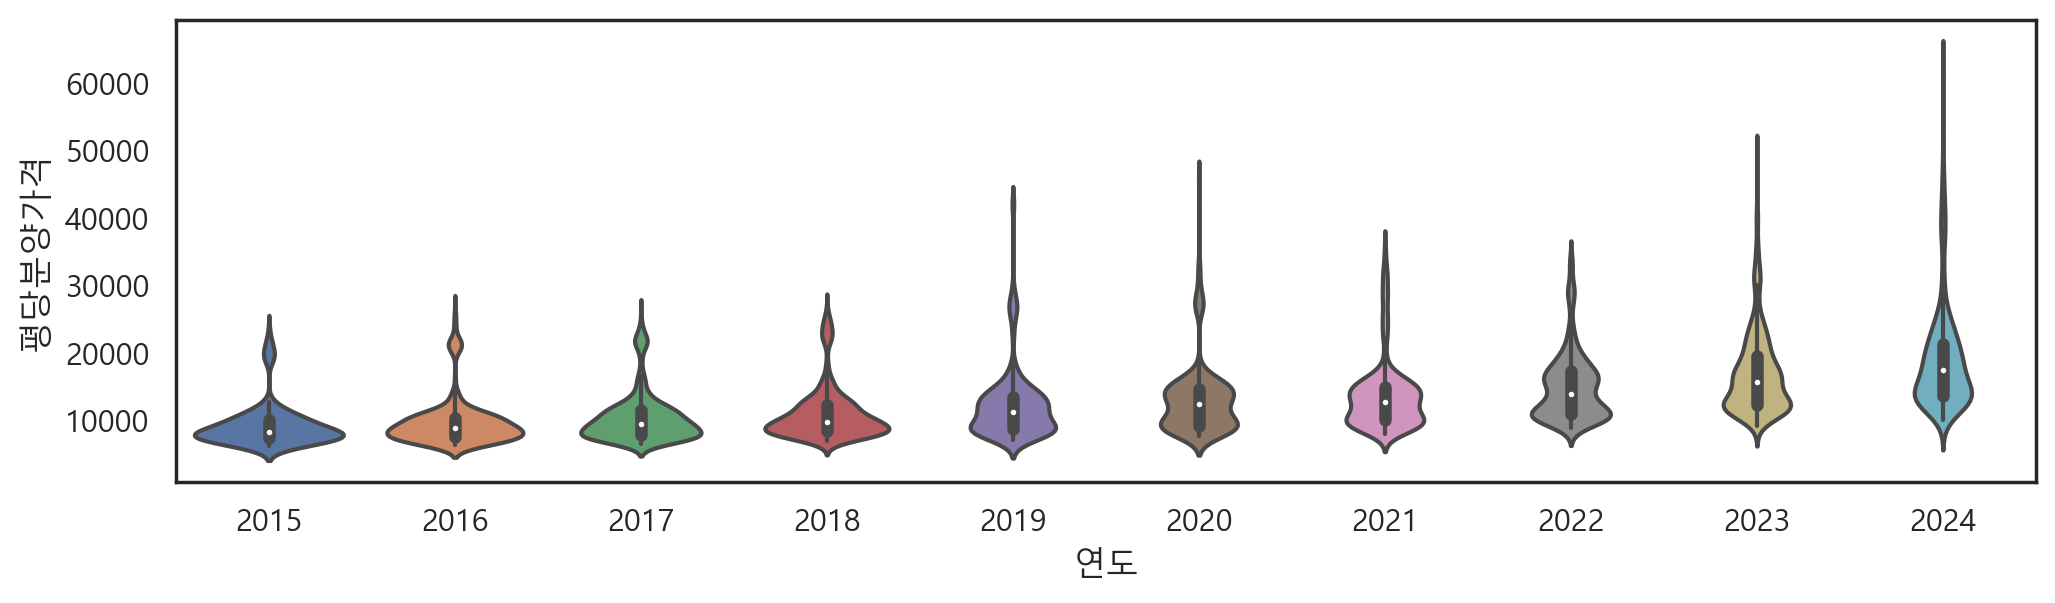

In [210]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격')

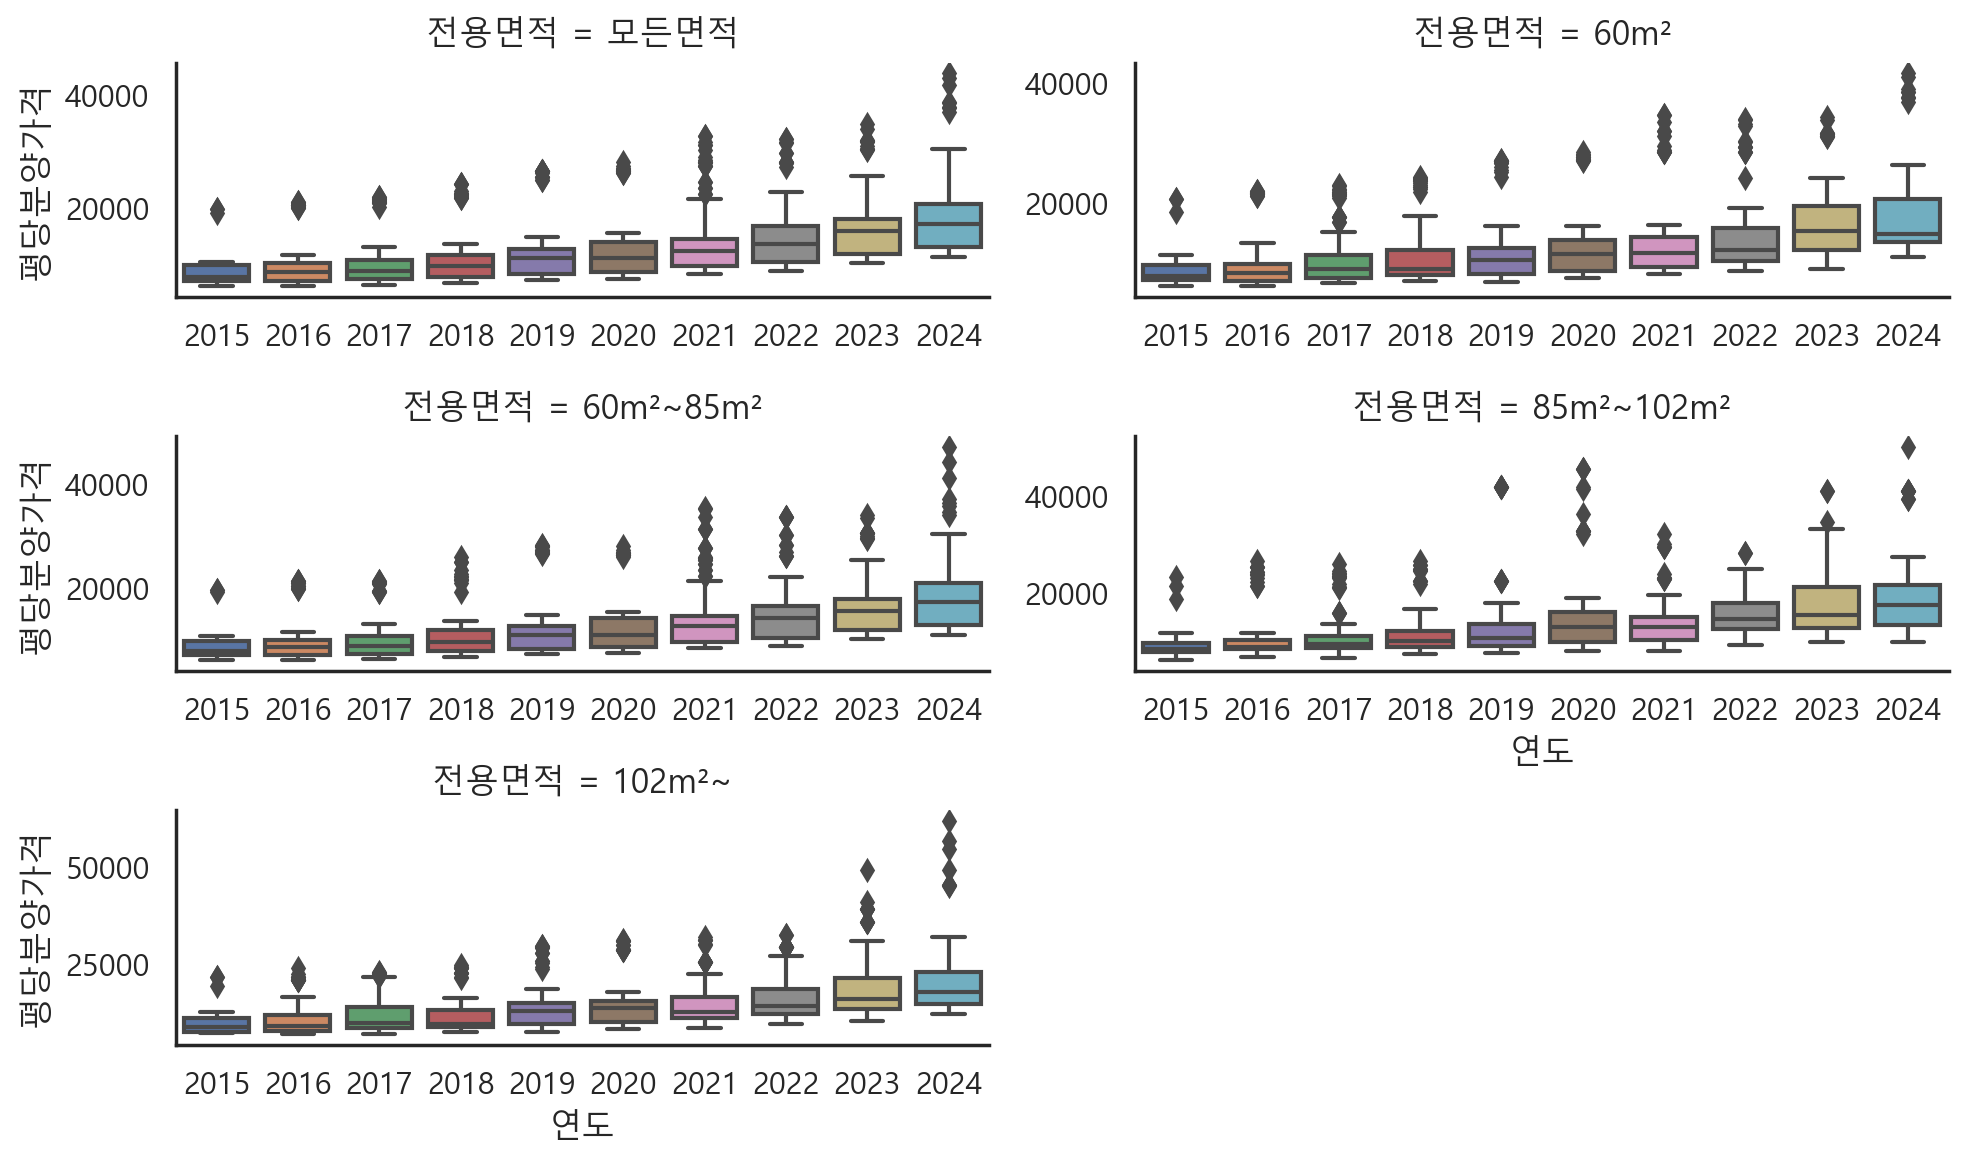

In [211]:
g= sns.catplot(data=df_last, x= '연도', y='평당분양가격', kind='box',col='전용면적',col_wrap=2,
           sharex=False, sharey=False)
g.fig.set_size_inches(10,6)
plt.tight_layout()
plt.show()

<Axes: xlabel='연도', ylabel='평당분양가격'>

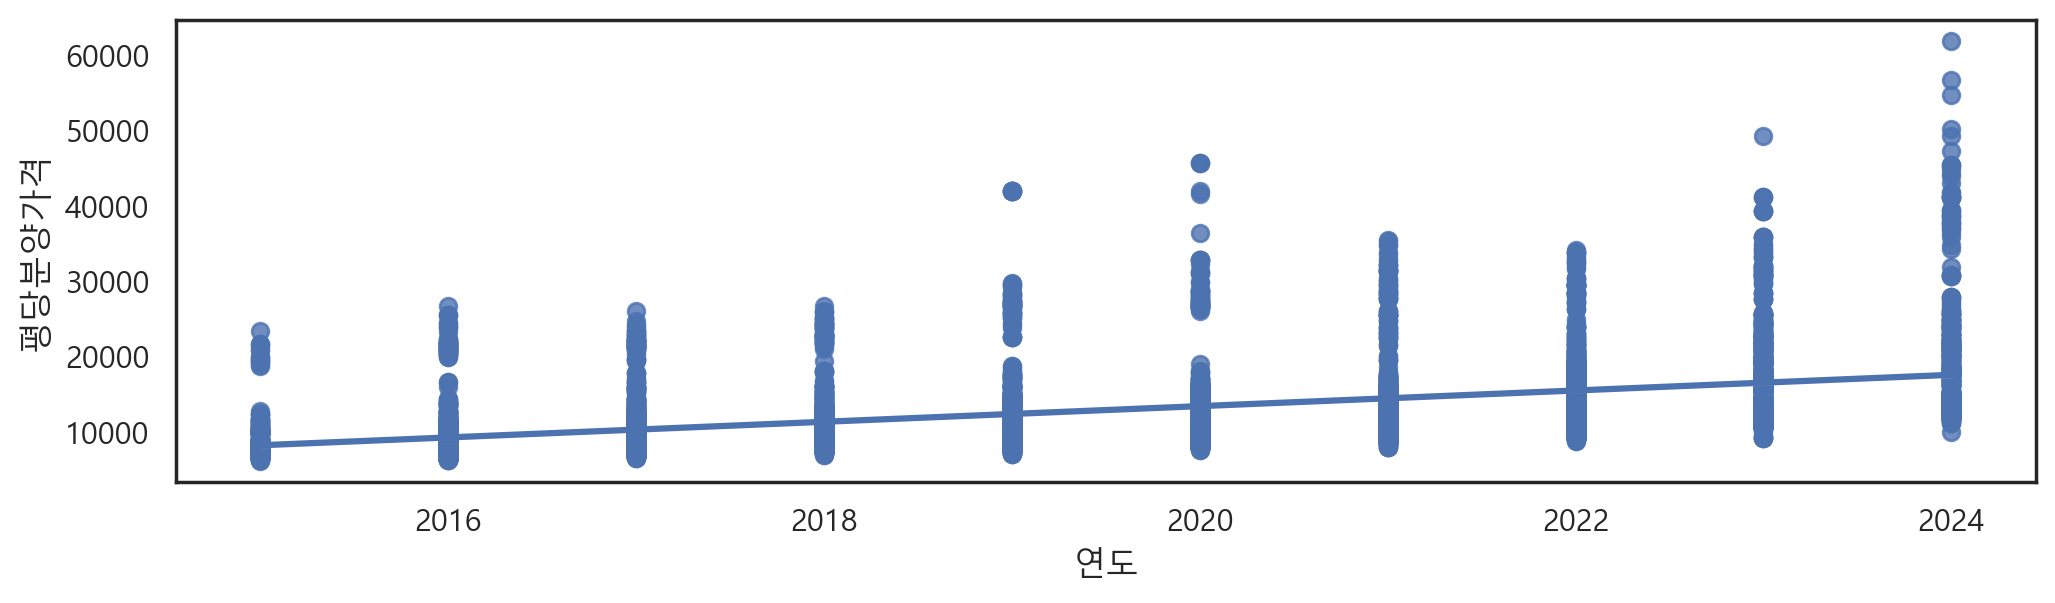

In [212]:
# 연도에 따른 평당분양가격을회귀식으로 시각화(scatter plot에 회귀선을 시각화)
sns.regplot(data=df_last, x='연도', y='평당분양가격') # hue가 안 됨

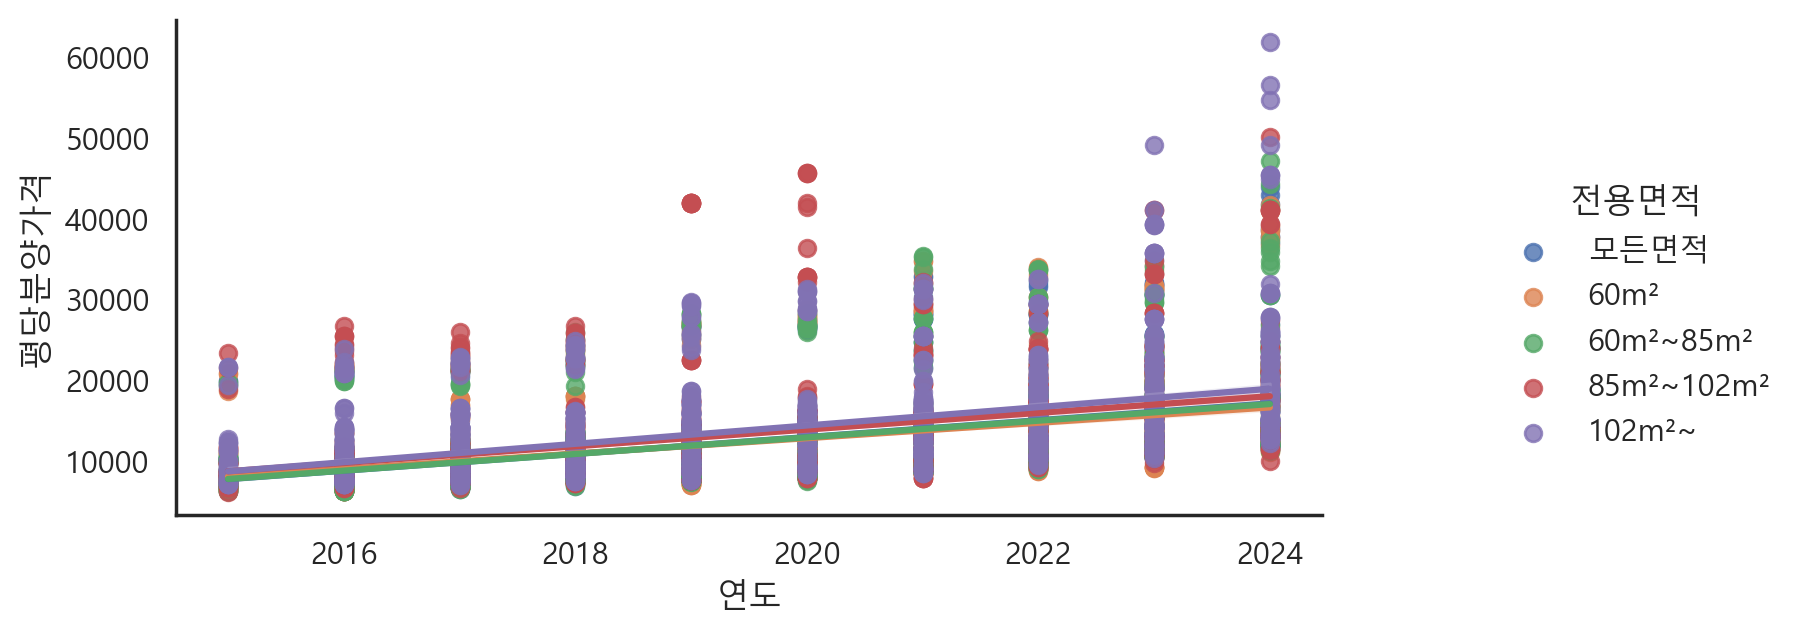

In [213]:
g= sns.lmplot(data=df_last, x='연도', y= '평당분양가격', hue='전용면적')
g.fig.set_size_inches(10,3)

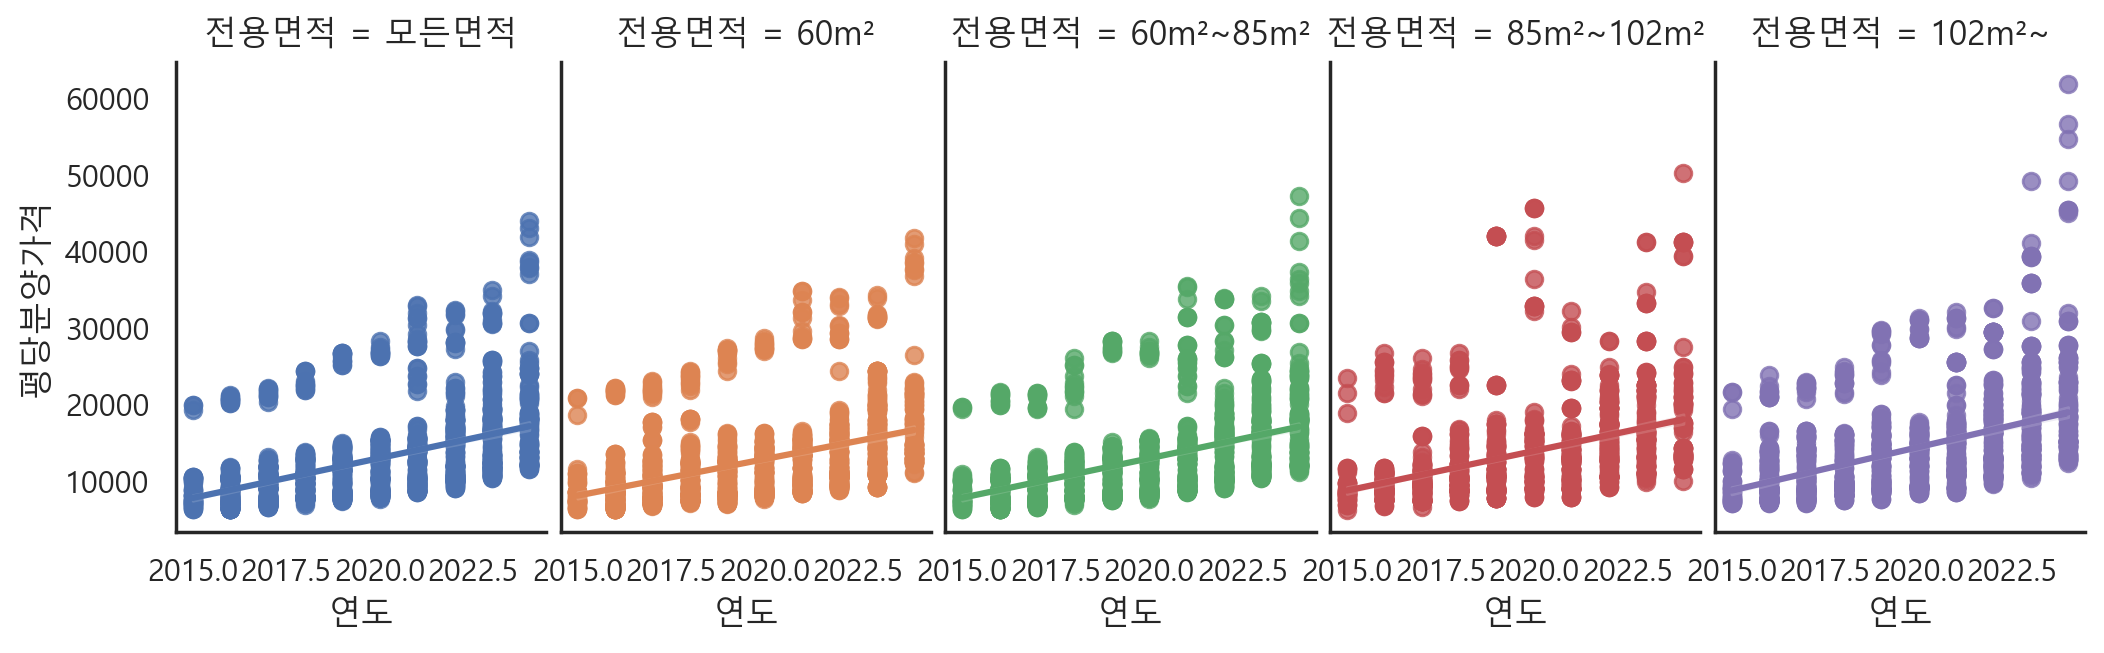

In [214]:
g= sns.lmplot(data=df_last, x='연도', y= '평당분양가격', hue='전용면적', col='전용면적')
g.fig.set_size_inches(10,3)

CPU times: total: 93.8 ms
Wall time: 86.1 ms


<Axes: xlabel='연도', ylabel='평당분양가격'>

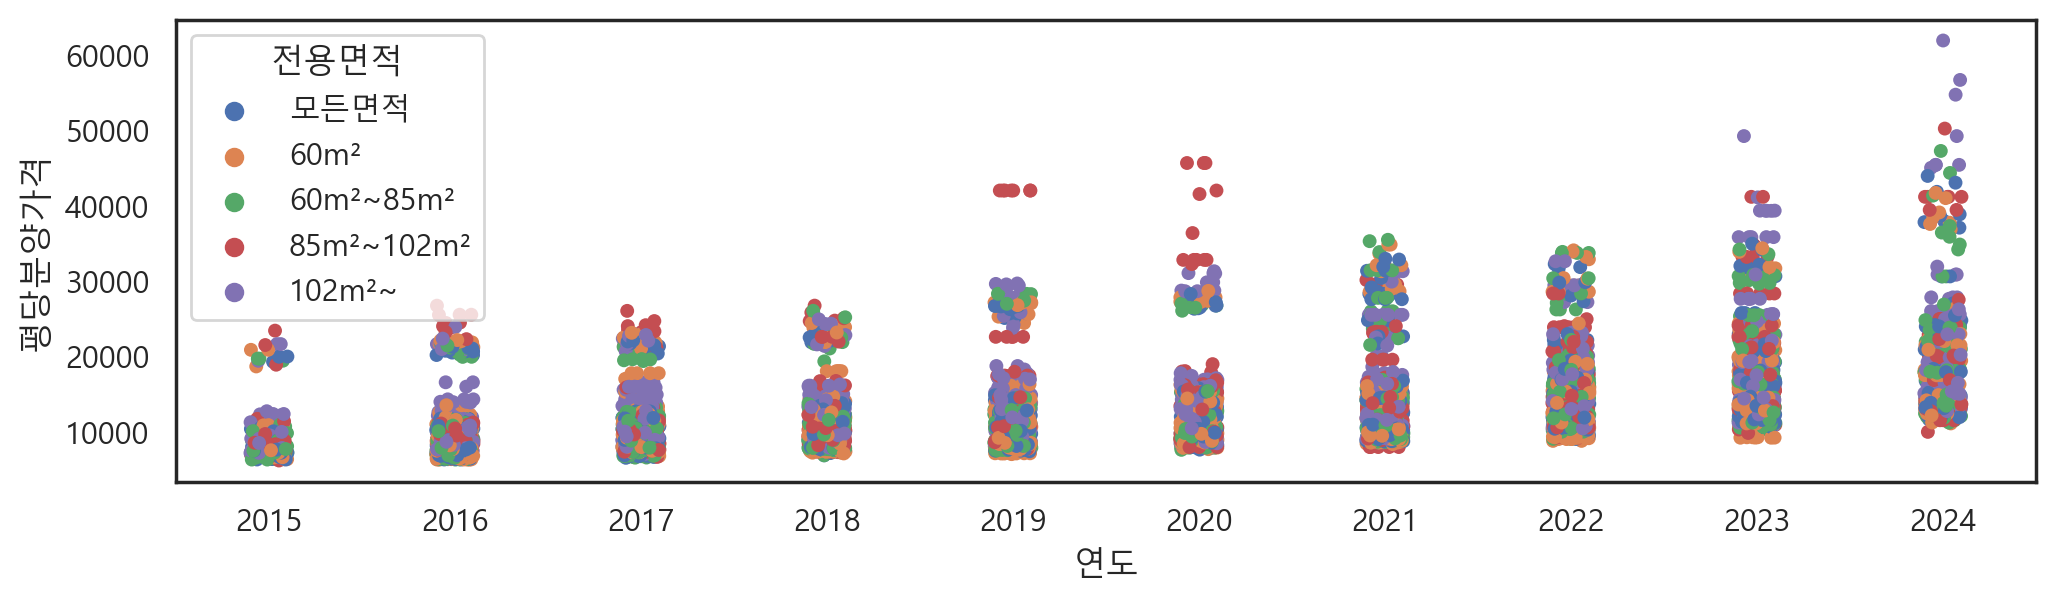

In [215]:
%%time
sns.stripplot(data= df_last, x='연도', y='평당분양가격', hue='전용면적')

CPU times: total: 35.4 s
Wall time: 35.5 s


<Axes: xlabel='연도', ylabel='평당분양가격'>

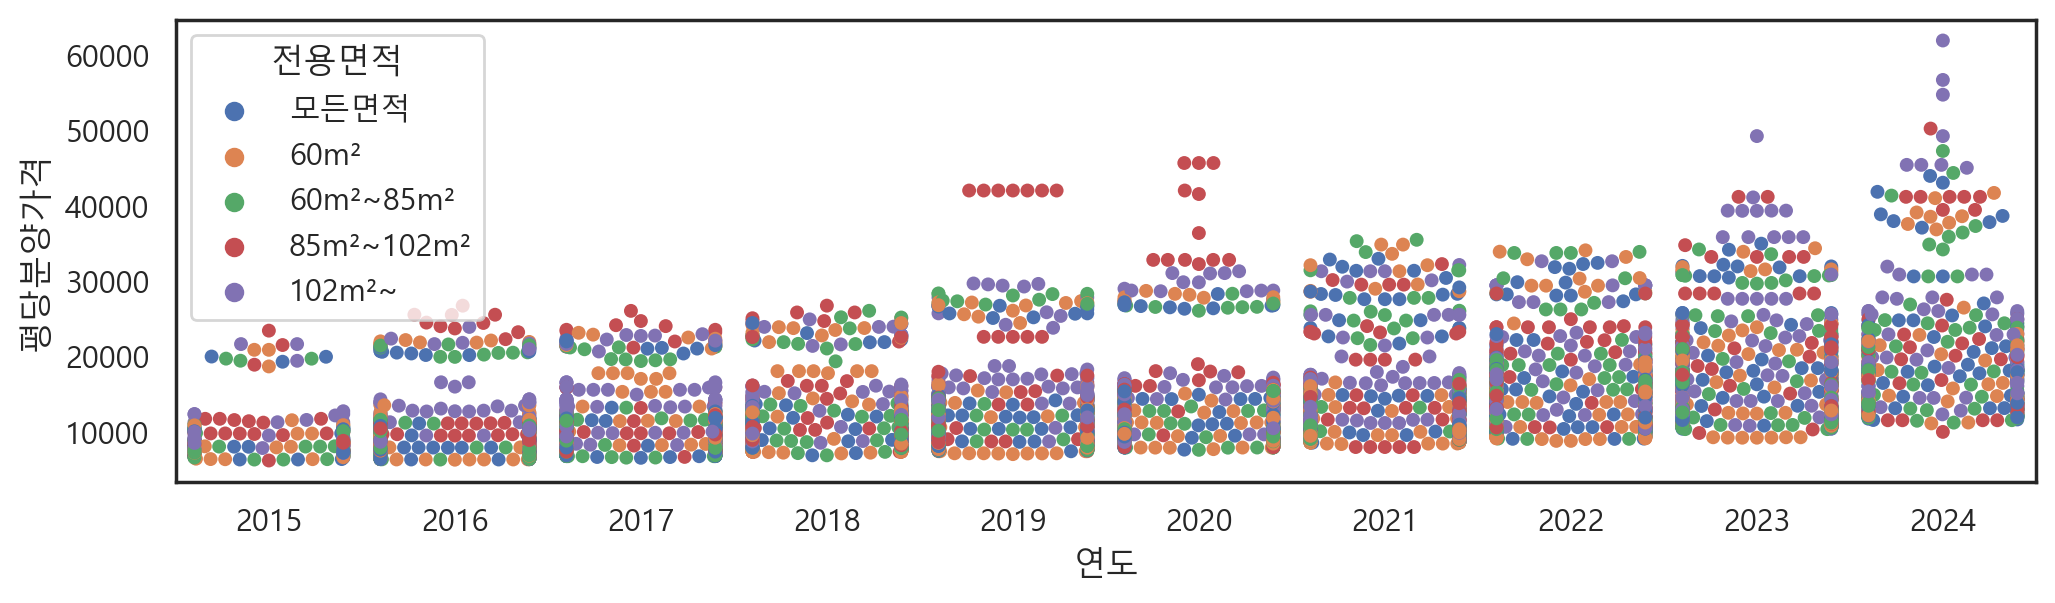

In [216]:
%%time
sns.swarmplot(data= df_last, x='연도', y='평당분양가격', hue='전용면적')


In [217]:
#sampling
df_sample= df_last.sample(frac=0.1, random_state=42)

CPU times: total: 422 ms
Wall time: 421 ms


<Axes: xlabel='연도', ylabel='평당분양가격'>

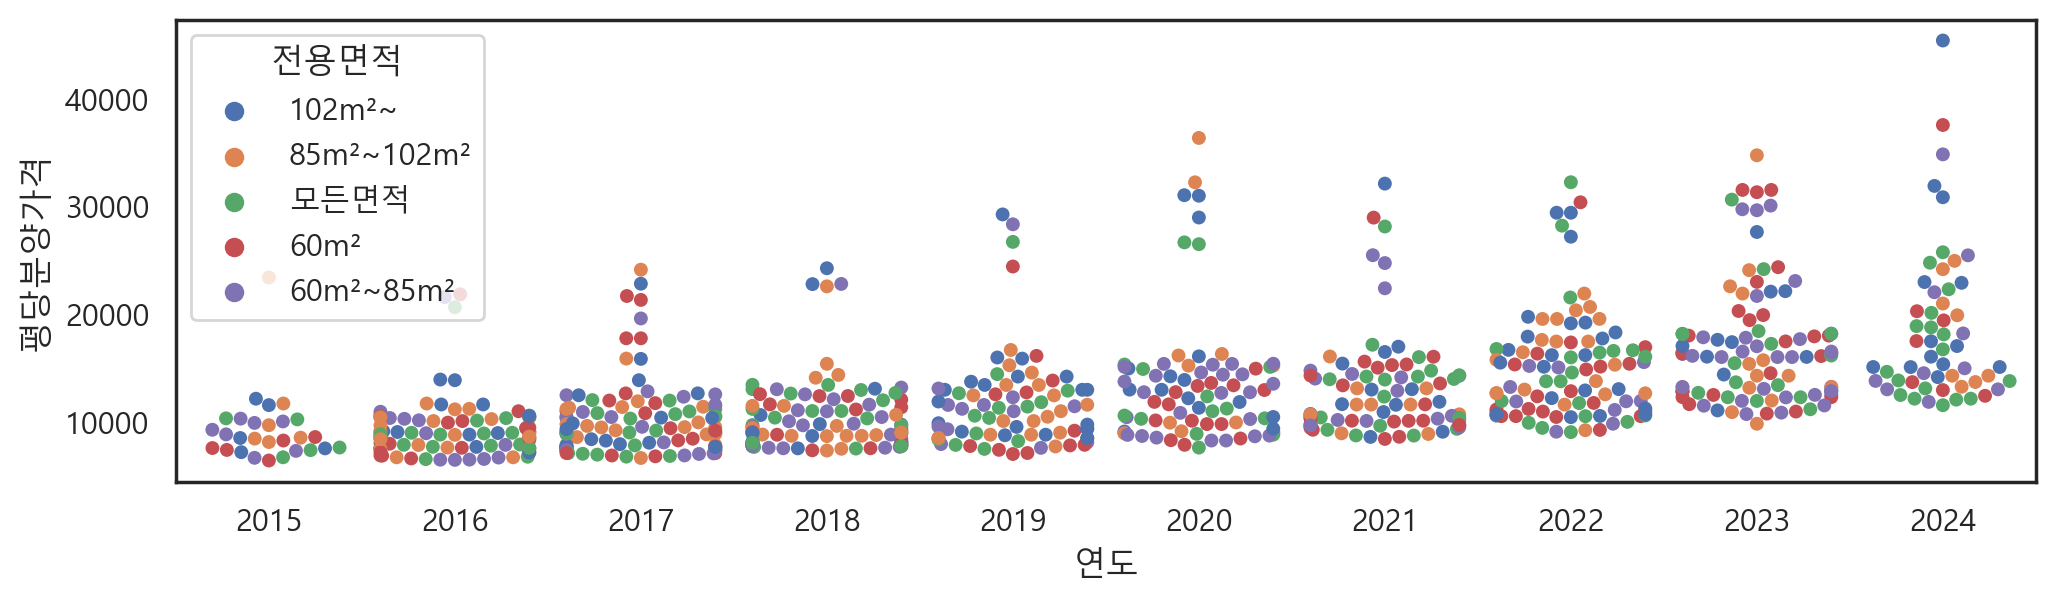

In [218]:
%%time
sns.swarmplot(data=df_sample, x='연도',y='평당분양가격',hue='전용면적')

<Axes: xlabel='평당분양가격', ylabel='Count'>

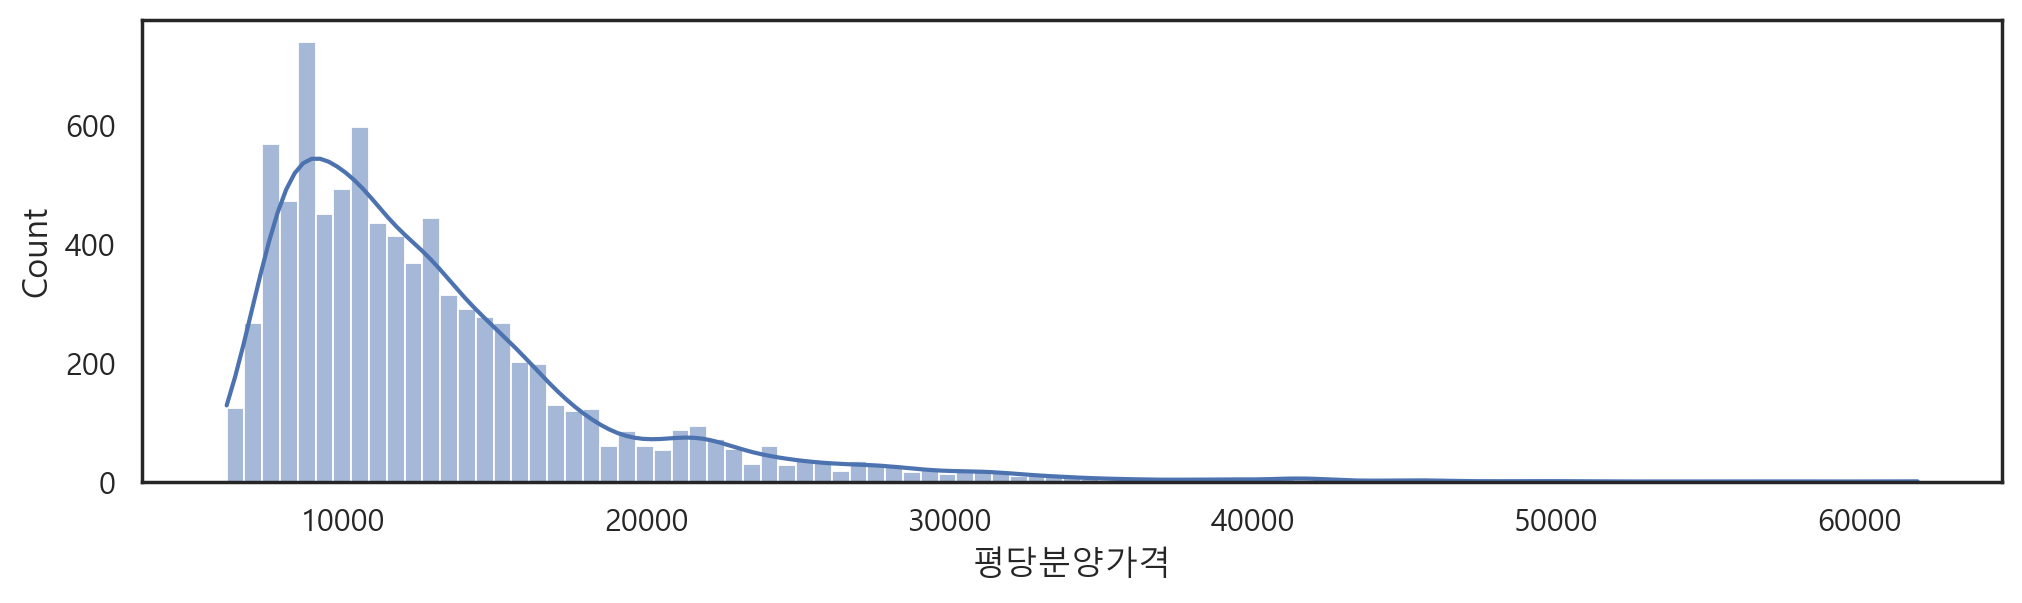

In [219]:
# 분양가격의 히스토그램(hist; 도수분포표)
# df_last['평당분양가격'].hist(bins=50)
sns.histplot(data=df_last, x='평당분양가격', kde= True)

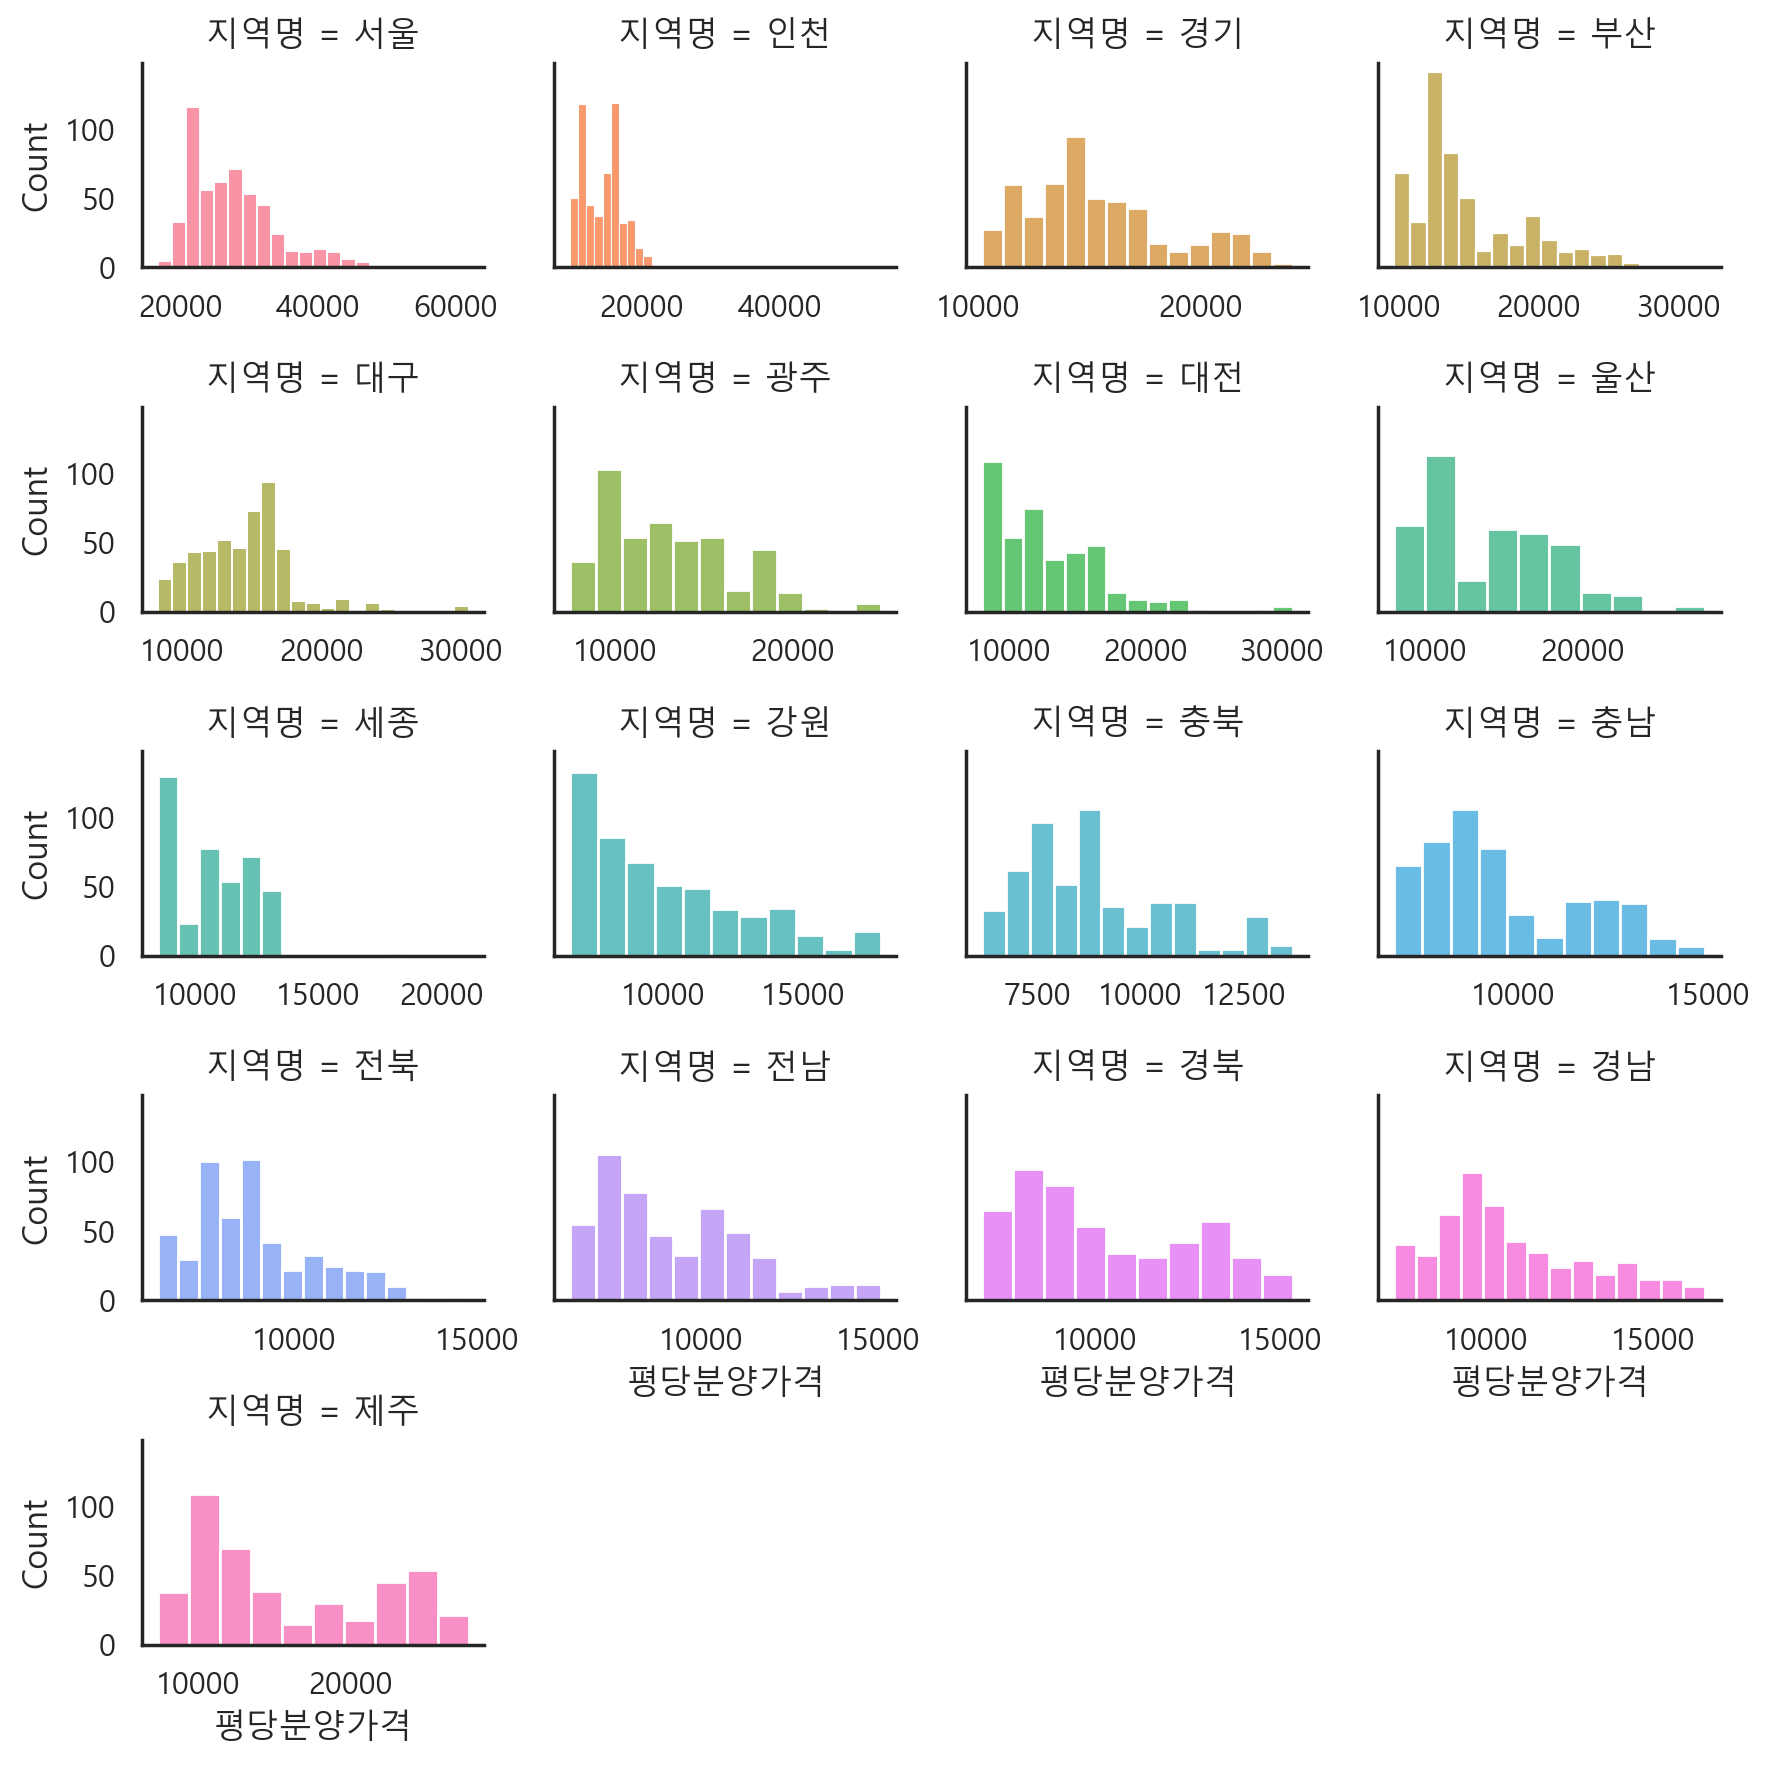

In [220]:
# 지역별 평당분양가격의 히스토그램(서브플롯)
g= sns.FacetGrid(df_last, col='지역명', hue='지역명', col_wrap=4, sharex=False)
g.map(sns.histplot, '평당분양가격')
g.fig.set_size_inches(9,9)
plt.tight_layout()

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

In [221]:
df_first= pd.read_csv('C:/aii/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
display(df_first.head(1))
display(df_last.head(1))

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3


In [222]:
new_first = df_first.melt(id_vars='지역', 
                          var_name='연도월', 
                          value_name='평당분양가격')
new_first.head(1)

,지역,연도월,평당분양가격
0,서울,2013년12월,18189


In [223]:

parse_year = lambda datestr : int(datestr.split('년')[0])
parse_year("2013년12월")

2013

In [224]:

parse_month = lambda datestr : int(datestr.split('년')[-1][:-1])
parse_month("2013년12월")

12

In [225]:
new_first['연도'] = new_first['연도월'].map(
                            lambda datestr : int(datestr.split('년')[0])
                    )
new_first['월'] = new_first['연도월'].apply(
                            lambda datestr : int(datestr.split('년')[-1][:-1])
                    )
new_first.head()

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [226]:
new_first.drop('연도월', axis=1, inplace=True)
new_first.head(1)

,지역,평당분양가격,연도,월
0,서울,18189,2013,12


In [227]:
# new_first.columns = ['지역명', '평당분양가격', '연도', '월']
new_first = new_first.rename(columns={'지역':'지역명'})
new_first.tail(1)

,지역명,평당분양가격,연도,월
356,제주,7343,2015,8


In [228]:
 df_last.loc[df_last['전용면적']=='모든면적', 
             ['지역명','연도','월','평당분양가격']]
new_last = df_last[df_last['전용면적']=='모든면적']
new_last.drop('전용면적', axis=1, inplace=True)
new_last.sample()

,지역명,연도,월,평당분양가격
4030,울산,2019,9,8992.5


In [229]:
df = pd.concat([new_first, new_last]).reset_index(drop=True)
df.head(1)

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12


In [230]:
df.to_csv('data/ch13_df(결측치처리전).csv', index=False)

## (2) 결측치 대체(연도별, 지역별 중위값)

In [231]:
# 연도별 지역별 평당분양가격 중위값
fillnavalue= df.groupby(['연도','지역명'])['평당분양가격'].median().unstack()
df.pivot_table(index='연도', columns='지역명',values='평당분양가격',aggfunc='median')
# 연도별 지역별 평당분양가격 중위값
fillnavalue = df.groupby(['연도','지역명'])['평당분양가격'].median().unstack()
fillnavalue = df.pivot_table(index='연도', 
                           columns='지역명', 
                           values='평당분양가격',
                           aggfunc='median')
fillnavalue

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.00,10855.00,6473.00,6168.00,6098.00,8080.00,8321.00,8111.00,18189.00,7601.0,8090.00,10204.00,5678.00,6282.00,7674.00,6365.00,6589.00
2014,6350.00,10449.00,6611.50,6555.00,7617.00,8317.00,8327.00,9233.00,19070.50,8067.0,8153.00,10018.00,5716.00,6335.00,7900.00,6724.50,6593.50
2015,6986.00,10518.00,7665.00,7006.00,7914.00,8542.00,8079.00,9515.00,19275.30,8669.0,9192.00,10443.00,6243.00,6583.00,7365.60,6975.00,6705.60
2016,6964.65,11342.10,7865.55,7385.40,8987.55,10335.60,8380.35,10414.80,20654.70,8860.5,10127.70,10531.95,6491.10,6369.00,9329.10,7377.15,6801.30
2017,7057.05,11919.60,8052.00,7835.85,9551.85,11231.55,9035.40,11851.95,21402.15,9018.9,11488.95,10875.15,7114.80,7222.05,10885.05,7448.10,6765.00
2018,7669.20,13099.35,8898.45,8667.45,9678.90,12178.65,9807.60,12926.10,22567.05,10388.4,10312.50,11233.20,7774.80,7652.70,11649.00,8030.55,7870.50
2019,8221.95,14487.00,9791.10,8723.55,12071.40,13963.95,11866.80,13061.40,26428.05,11411.4,10362.00,12827.10,7920.00,8146.05,12561.45,8598.15,7570.20
2020,9271.35,14331.90,10263.00,9929.70,12624.15,15302.10,11030.25,13266.00,26769.60,11355.3,12581.25,14648.70,8571.75,8225.25,15130.50,8863.80,7924.95
2021,9607.95,14173.50,10523.70,10338.90,14127.30,15528.15,12196.80,14460.60,29769.30,12533.4,14256.00,14950.65,9857.10,8834.10,23756.70,9306.00,8677.35


In [232]:
fillnavalue.loc[2023,'서울']

31861.5

In [233]:
def fillna_median(row):
    # np.isnan(값) : 값이 nana인지 여부(값이 숫자일 경우. 숫자가 아니면 에러)
    # pd.isna(값) : 값이 nan인지 여부(값이 타입과 상관없음
    # pd.isnull(값) : 값이 nan이거나 None인지 여부
    # 값 is np.nan : 값이 nan인지 여부
    row= row.copy()
    if np.isnan(row['평당분양가격']):
        year=row['연도']
        loc= row['지역명']
        row['평당분양가격']= fillnavalue.loc[year, loc]
    return row
fillna_median(df.loc[1010])

지역명            울산
평당분양가격    10312.5
연도           2018
월              12
Name: 1010, dtype: object

In [234]:
df[df['평당분양가격'].isna()].head()

,지역명,평당분양가격,연도,월
1010,울산,NaN,2018,12
1027,울산,NaN,2019,1
1044,울산,NaN,2019,2
1061,울산,NaN,2019,3
1078,울산,NaN,2019,4


In [235]:
# 결측치 대체방법1
df1= df.apply(fillna_median, axis=1)
df1.isna().sum()

지역명       0
평당분양가격    0
연도        0
월         0
dtype: int64

In [237]:
# 결측치 대체 방법2
df2= df.copy()
df2['평당분양가격']= df2.groupby(['지역명','연도'])['평당분양가격'].transform(lambda x: x.fillna(x.median()))

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8


## (3) df.csv파일로 출력

In [239]:
df1.to_csv('data/ch13_df(결측치중위값으로대체).csv', index=False)

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

In [241]:
df1.groupby(['지역명'])['평당분양가격'].count()

지역명
강원    128
경기    128
경남    128
경북    128
광주    128
대구    128
대전    128
부산    128
서울    128
세종    128
울산    128
인천    128
전남    128
전북    128
제주    128
충남    128
충북    128
Name: 평당분양가격, dtype: int64

In [243]:
df.groupby('지역명').count()

,평당분양가격,연도,월
지역명,,,
강원,128,128,128
경기,128,128,128
경남,128,128,128
경북,128,128,128
광주,128,128,128
대구,125,128,128
대전,128,128,128
부산,128,128,128
서울,128,128,128


### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [244]:
df.groupby(['지역명'])[['평당분양가격']].max()\
            .sort_values(by='평당분양가격', 
                         ascending=False).head(3)

,평당분양가격
지역명,
서울,43939.5
인천,41830.8
대구,30600.9


In [246]:
df.groupby('지역명')['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,128.0,9035.030469,2581.361744,6141.0,7016.250,8131.20,10355.400,15120.6
경기,128.0,14035.542969,3146.644392,10124.0,11501.325,13831.95,15061.200,21591.9
경남,128.0,9642.546094,2017.119966,6473.0,7877.100,9690.45,10944.450,14543.1
경북,128.0,9337.025000,2263.474310,6168.0,7425.825,8713.65,10880.100,13827.0
광주,128.0,11952.633594,3665.696607,6098.0,9023.025,11267.85,14545.575,23964.6
대구,125.0,13482.482400,4155.130887,8077.0,10335.600,13180.20,15675.000,30600.9
대전,128.0,11331.642969,3003.475781,8038.0,8454.600,11053.35,12600.225,18767.1
부산,128.0,13852.528906,3999.865650,8111.0,10479.975,13035.00,16800.300,27017.1
서울,128.0,25545.817187,5715.838690,17925.0,20670.900,25667.40,28733.925,43939.5


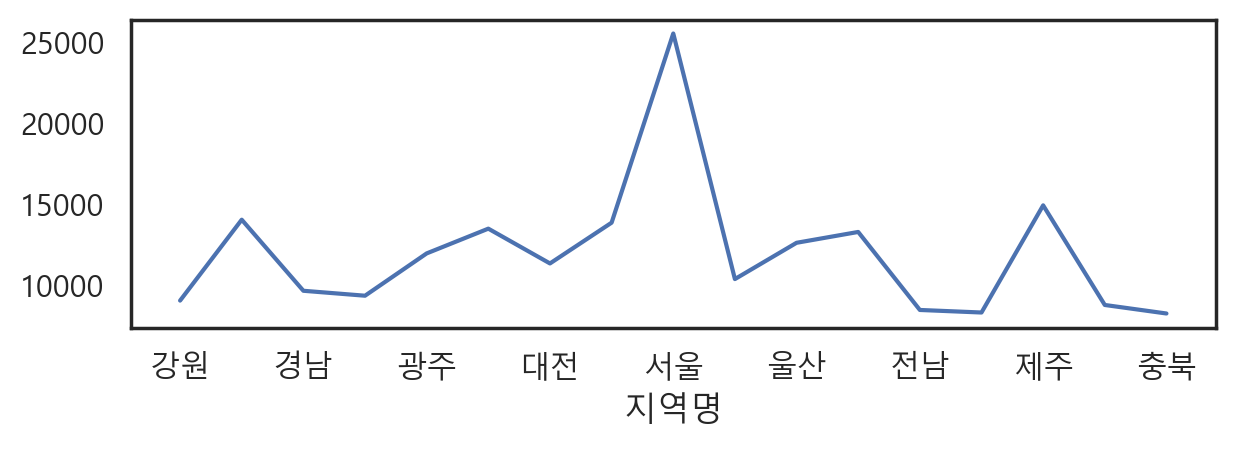

In [245]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)
df.groupby('지역명')['평당분양가격'].mean().plot(kind='line', figsize=(7,2))
plt.show()

### ③ 연도별 평당분양가격(평균)

In [ ]:
df.groupby(['연도'])[['평당분양가격']].mean()

In [ ]:
result = df.pivot_table(index='연도',
          values='평당분양가격').sort_values(by='평당분양가격')
result

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)
result.plot(kind='line', figsize=(20,3))
for year, val in zip(result.index, result['평당분양가격']):
    plt.text(year-0.2, val+300, round(val))
plt.xticks(result.index)
plt.ylim([5000, 20000])
plt.show()

In [ ]:
result.plot(kind='bar', figsize=(20,3), rot=0)
for year, val in enumerate(result['평당분양가격']):
    plt.text(year-0.2, val+300, round(val))
plt.ylim([5000, 20000])
plt.show()

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:

df.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()

In [ ]:
r = df_last.pivot_table(index=['연도','지역명'],
                   values='평당분양가격').unstack()
r

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)
plt.figure(figsize=(20,5))
sns.heatmap(r, annot=True, fmt='.0f', cmap="Blues",
           annot_kws={'weight':'bold', 'color':'green', "size":12},
           cbar=False)
plt.show()

In [ ]:
# 년도별 평균 평당분양가격의 추이
sns.lineplot(data=df, x="연도", y="평당분양가격")
plt.show()

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리
sns.relplot(data=df, x='연도', y='평당분양가격', hue='지역명',
           kind='line', col='지역명', col_wrap=4,
           facet_kws={'sharey': False, 'sharex': True})
plt.show()

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot
g = sns.catplot(data=df, x="연도", y="평당분양가격",
           kind="bar", col="지역명", col_wrap=4,
           palette="pastel",
           facet_kws={'sharex':False, 'sharey':True}
               )
g.fig.set_size_inches(10,10)
plt.tight_layout() # 서브플롯 레이아웃 타이트하게 조정
plt.show()

In [ ]:
# 연도별 평당분양가격의 사분위수
sns.boxplot(data=df, x="연도", y="평당분양가격")
plt.show()

In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)
sns.boxenplot(data=df, x="연도", y="평당분양가격")
plt.show()

In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)
sns.violinplot(data=df, x="연도", y="평당분양가격")
plt.show()

In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화
plt.figure(figsize=(10,5))
sns.regplot(data=df, x="연도", y="평당분양가격")
plt.show()# regplot은 hue속성을 쓸 수 없음

In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 df_sample = df.sample(frac=0.05, random_state=42) # fraction : 무작위 샘플링
sns.swarmplot(data=df_sample, x="연도", y="평당분양가격")
plt.show()

In [ ]:
# 분양가격을 hist
df["평당분양가격"].hist(bins=20)
plt.show()